In [126]:
%pip install scikit-learn
%pip install tensorflow
%pip install pandas
%pip install keras
%pip install matplotlib

c:\Users\minso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.4668, Test Accuracy: 0.8295


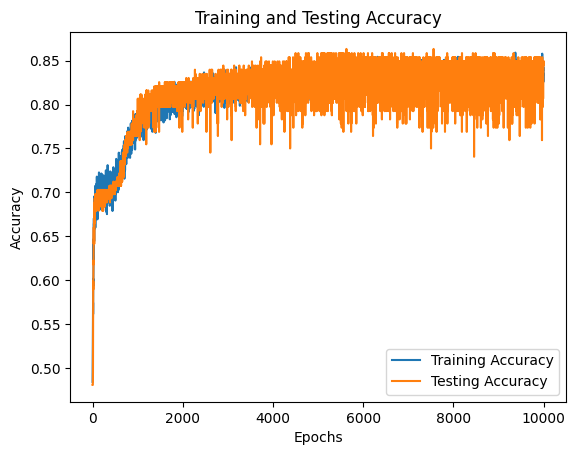

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.5492
              precision    recall  f1-score   support

           0       0.71      0.10      0.17       126
           1       0.54      0.96      0.69       138

    accuracy                           0.55       264
   macro avg       0.62      0.53      0.43       264
weighted avg       0.62      0.55      0.44       264



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load data
df = pd.read_csv('training_data.csv')
X = df.drop('State', axis=1)
y = df['State']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a more complex neural network model
def build_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_shape,)),
        Dropout(0.4),  # Adjusted dropout rate
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.4),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = build_model(X_train_scaled.shape[1])

# Train the model with early stopping to prevent overfitting
history = model.fit(X_train_scaled, y_train, epochs=10000, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training and testing curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

predictions = model.predict(X_test)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]
print(f'Accuracy: {accuracy_score(y_test, predictions):.4f}')
print(classification_report(y_test, predictions))